In [1]:
# ============================================
# 📦 Install & Import Required Libraries
# ============================================
!pip install qiskit qiskit-aer pylatexenc --upgrade -q

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
sim = AerSimulator()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


# CIRCUIT DEFINITION: H → CNOT → CZ → SWAP

🔹 2-Qubit Quantum Circuit (before measurement):


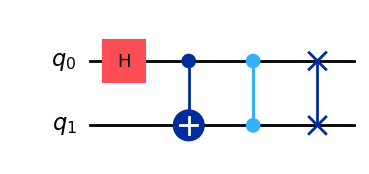

In [6]:
# ======================================================
# 🧩 CIRCUIT DEFINITION: H → CNOT → CZ → SWAP
# ======================================================
# Define the circuit without measurements first for state visualization later
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.cz(0, 1)
qc.swap(0, 1)

print("🔹 2-Qubit Quantum Circuit (before measurement):")
display(qc.draw('mpl'))



Measurement Counts: {'00': 483, '11': 541}


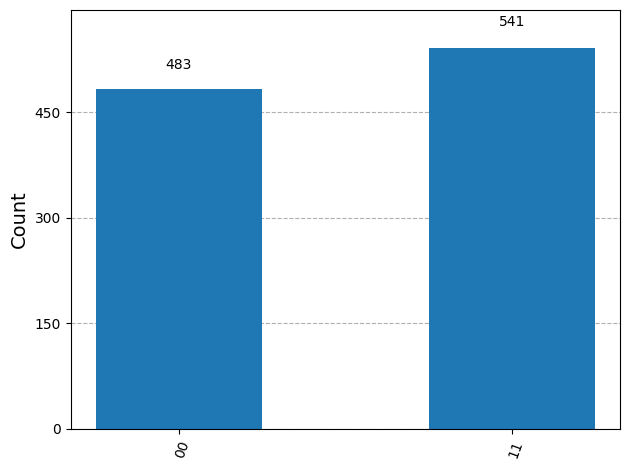

In [5]:
# Create a copy for simulation so the original qc remains without measurements
qc_sim = qc.copy()
qc_sim.measure_all() # Adds 2 classical bits automatically

# Transpile and run the simulation
compiled = transpile(qc_sim, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Counts:", counts)

# Plot the histogram 📈
plot_histogram(counts)


Bloch Vectors of the final state:


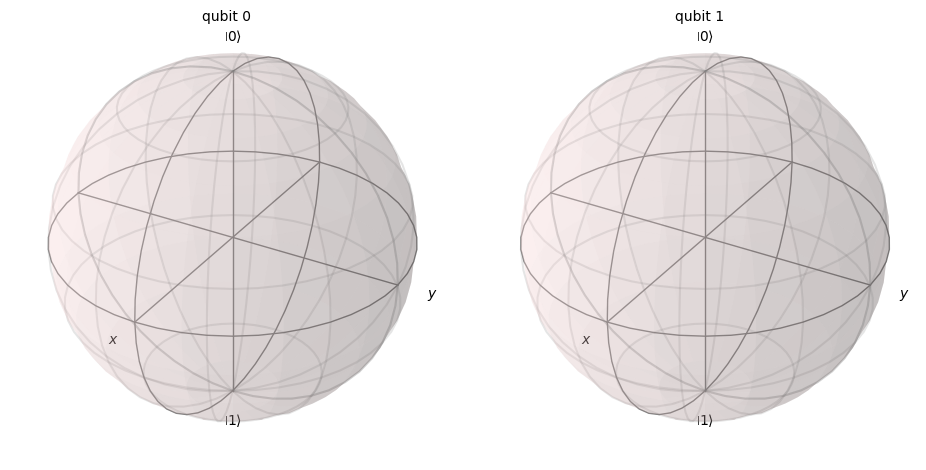

In [7]:
# Use the original circuit to get the state *before* measurement
state = Statevector.from_instruction(qc)

print("\nBloch Vectors of the final state:")
plot_bloch_multivector(state)

# TASK 1: CONTROL / TARGET VARIATION

🔹 Circuit with Swapped Control and Target:


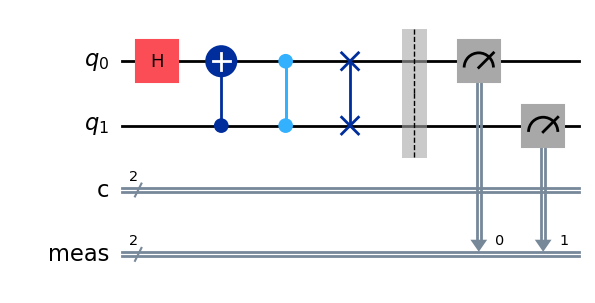


Measurement Counts (control/target swapped): {'10 00': 510, '00 00': 514}


In [8]:
# ======================================================
# 🧠 TASK 1: CONTROL / TARGET VARIATION
# ======================================================
qc_var = QuantumCircuit(2, 2)

qc_var.h(0)
qc_var.cx(1, 0)   # CNOT with control=1, target=0 (swapped)
qc_var.cz(1, 0)   # Controlled-Z swapped
qc_var.swap(0, 1)
qc_var.measure_all()

print("🔹 Circuit with Swapped Control and Target:")
display(qc_var.draw('mpl'))

# Transpile, run, and get the results
compiled = transpile(qc_var, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("\nMeasurement Counts (control/target swapped):", counts)

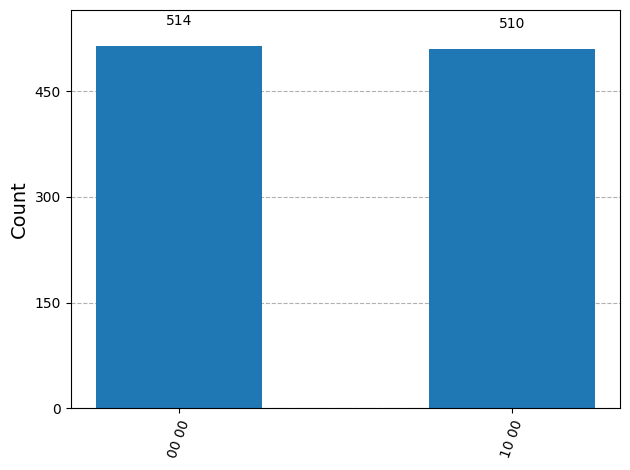

In [9]:
# Plot the results from the previous cell
plot_histogram(counts)

In [14]:
# 💬 Explanation:
# Swapping control/target reverses how entanglement is created.
# The CNOT now flips qubit-0 *based on* qubit-1’s state.
# This changes correlation patterns, so probabilities differ.

# TASK 2: GATE REMOVAL (SWAP)

🔹 Circuit Without SWAP Gate:


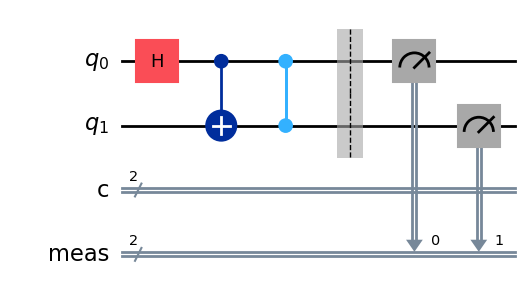


Measurement Counts (no SWAP): {'11 00': 510, '00 00': 514}


In [10]:
# ======================================================
# ❌ TASK 2: GATE REMOVAL (SWAP)
# ======================================================
qc_no_swap = QuantumCircuit(2, 2)

qc_no_swap.h(0)
qc_no_swap.cx(0, 1)
qc_no_swap.cz(0, 1)
# (SWAP gate is removed)
qc_no_swap.measure_all()

print("🔹 Circuit Without SWAP Gate:")
display(qc_no_swap.draw('mpl'))

# Transpile, run, and get the results
compiled = transpile(qc_no_swap, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("\nMeasurement Counts (no SWAP):", counts)

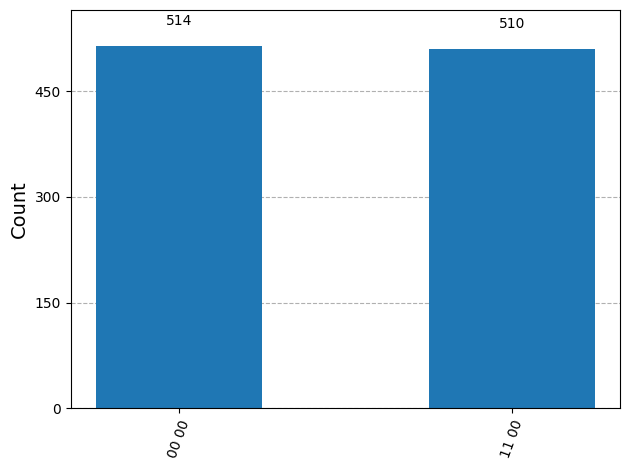

In [11]:
# Plot the results from the previous cell
plot_histogram(counts)

In [15]:
# 💬 Observation:
# Removing SWAP leaves the qubits in their original roles.
# The final entangled state stays but qubit positions differ.
# SWAP only exchanges quantum states between the two qubits.

# TASK 3: ADD ANOTHER HADAMARD

🔹 Circuit with Extra Hadamard on Qubit-1:


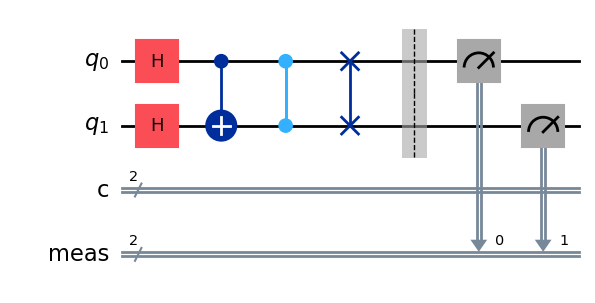


Measurement Counts (extra H on qubit-1): {'11 00': 265, '10 00': 229, '00 00': 258, '01 00': 272}


In [12]:
# ======================================================
# ➕ TASK 3: ADD ANOTHER HADAMARD
# ======================================================
qc_h2 = QuantumCircuit(2, 2)

qc_h2.h(0)
qc_h2.h(1)      # New Hadamard on qubit-1
qc_h2.cx(0, 1)
qc_h2.cz(0, 1)
qc_h2.swap(0, 1)
qc_h2.measure_all()

print("🔹 Circuit with Extra Hadamard on Qubit-1:")
display(qc_h2.draw('mpl'))

# Transpile, run, and get the results
compiled = transpile(qc_h2, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print("\nMeasurement Counts (extra H on qubit-1):", counts)

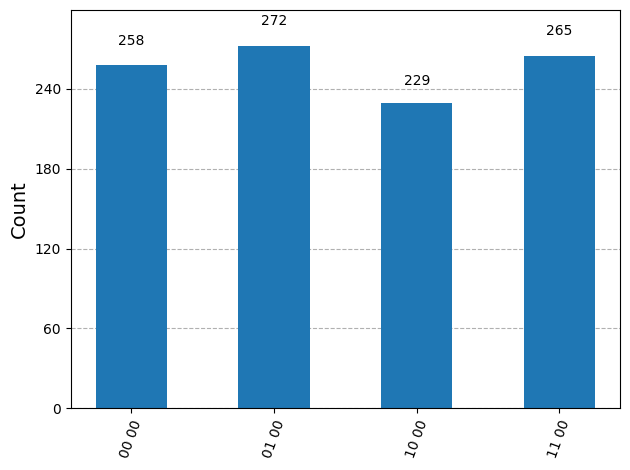

In [13]:
# Plot the results from the previous cell
plot_histogram(counts)

In [16]:
# 💬 Explanation:
# Adding an H on qubit-1 makes both qubits start in superposition.
# When CNOT and CZ follow, interference patterns intensify,
# often leading to more balanced or complex output probabilities.